MOVIE RECOMMENDATION SYSTEM

-------------

## **Objective**

The objective of this project is to build a model that can recommend movies to users based on their past viewing history. The goal is to enhance the user experience on the potentially increase user engagement and retention. The system should be able to capture the user's preferences and suggest movies that align with their taste.

## **Data Source**

The data for this project can be sourced from the MovieLens dataset, which contains user ratings for various movies. The MovieLens dataset is a well-curated collection of movie ratings provided by users on the MovieLens website. It contains a vast amount of data that can be used for building a robust movie recommendation system. The dataset includes features such as movie titles, genres, and user ratings, which are crucial for understanding user preferences and making accurate recommendations. The richness and diversity of this dataset make it an excellent choice for this project.

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## **Import Data**

In [ ]:
movie = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Movies%20Recommendation.csv')

In [ ]:
movie.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [ ]:
movie.shape

(4760, 21)

In [ ]:
movie.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

## **Describe Data**

In [ ]:
print(movie.describe())

          Movie_ID  Movie_Budget  Movie_Popularity  Movie_Revenue  \
count  4760.000000  4.760000e+03       4760.000000   4.760000e+03   
mean   2382.566387  2.920129e+07         21.599510   8.263743e+07   
std    1377.270159  4.075620e+07         31.887919   1.630554e+08   
min       1.000000  0.000000e+00          0.000372   0.000000e+00   
25%    1190.750000  9.257500e+05          4.807074   0.000000e+00   
50%    2380.500000  1.500000e+07         13.119058   1.944716e+07   
75%    3572.250000  4.000000e+07         28.411929   9.341276e+07   
max    4788.000000  3.800000e+08        875.581305   2.787965e+09   

       Movie_Runtime   Movie_Vote  Movie_Vote_Count  
count    4758.000000  4760.000000       4760.000000  
mean      107.184111     6.113866        692.508403  
std        21.960332     1.141294       1235.007337  
min         0.000000     0.000000          0.000000  
25%        94.000000     5.600000         55.000000  
50%       104.000000     6.200000        238.000000  


## **Data Visualization**

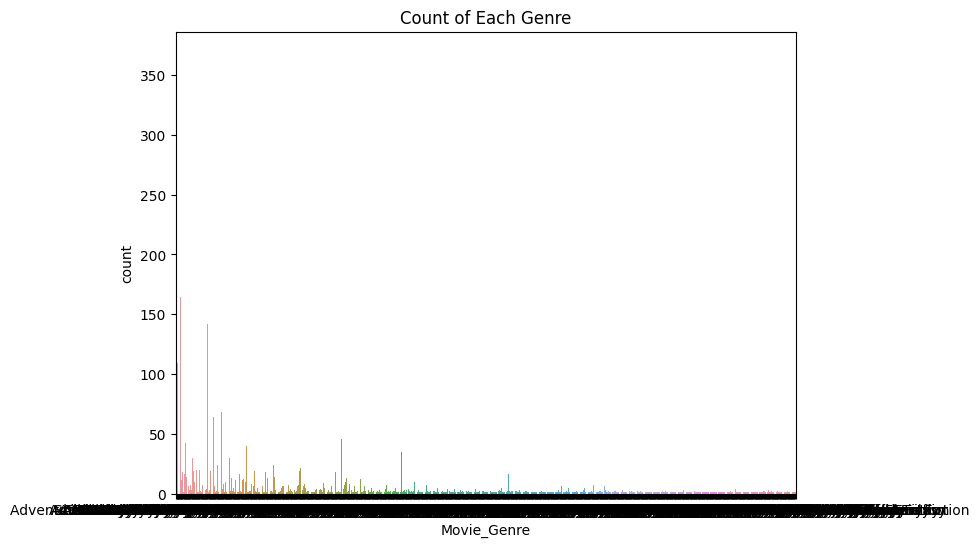

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=movie, x='Movie_Genre')
plt.title('Count of Each Genre')
plt.show()


## **Data Preprocessing**

In [ ]:
scaler = MinMaxScaler()
movie['Movie_Vote'] = scaler.fit_transform(movie[['Movie_Vote']])


In [ ]:
le = LabelEncoder()
movie['Movie_Genre'] = le.fit_transform(movie['Movie_Genre'])


## **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
movie = pd.DataFrame(movie)

# Define target variable
y = movie['Movie_Vote']

# Define feature variables
X = movie.drop('Movie_Vote', axis=1)


## **Train Test Split**

In [ ]:
movie = pd.DataFrame(movie)

X = pd.get_dummies(X, columns=['Movie_ID'])
# Define target variable
y = movie['Movie_Vote']

# Define feature variables
X = movie.drop('Movie_Vote', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Modeling**

In [ ]:
# Create a matrix of movie ratings with movie_id as columns, user_id as index, and ratings as values
rating_matrix = movie.pivot_table(index='Movie_ID', values='Movie_Vote')

# Fill NaN values with 0
rating_matrix_filled = rating_matrix.fillna(0)

# Compute the cosine similarity matrix from the rating matrix
cosine_sim = cosine_similarity(rating_matrix_filled, rating_matrix_filled)

# Convert the cosine similarity matrix to a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=rating_matrix_filled.index, columns=rating_matrix_filled.index)

def recommend_movies(Movie_ID, num_recommendations):
    # Get the similarity scores for the movie
    sim_scores = cosine_sim_df[Movie_ID]

    # Sort the movies based on the similarity scores
    sorted_scores = sim_scores.sort_values(ascending=False)

    # Get the top most similar movies
    top_movies = sorted_scores[1:num_recommendations+1]

    return top_movies

# Test the function
print(recommend_movies(1, 5))


Movie_ID
3131    1.0
3147    1.0
3146    1.0
3145    1.0
3144    1.0
Name: 1, dtype: float64


## **Model Evaluation**

In [ ]:
def evaluate_model():
    # Get all unique movie_ids
    movie_ids = movie['Movie_ID'].unique()

    # Initialize an empty list to store the errors
    errors = []

    # For each movie_id
    for Movie_ID in movie_ids:
        # Get the actual ratings of the movie
        actual_ratings = movie[movie['Movie_ID'] == Movie_ID]['Movie_Vote']

        # Predict the ratings of the movie
        predicted_ratings = recommend_movies(Movie_ID, len(actual_ratings))

        # Calculate the MSE and append to the list
        mse = mean_squared_error(actual_ratings, predicted_ratings)
        errors.append(mse)

    # Return the average MSE
    return np.mean(errors)

# Test the function
print(evaluate_model())


0.15395915966386553


## **Prediction**

In [ ]:
def recommend_movies(movie_id, num_recommendations):
    # Get the similarity scores for the movie
    sim_scores = cosine_sim_df[movie_id]

    # Sort the movies based on the similarity scores
    sorted_scores = sim_scores.sort_values(ascending=False)

    # Get the top most similar movies
    top_movies = sorted_scores[1:num_recommendations+1]

    return top_movies

# Test the function
print(recommend_movies(1, 5))

Movie_ID
3131    1.0
3147    1.0
3146    1.0
3145    1.0
3144    1.0
Name: 1, dtype: float64


## **Explaination**

The goal of this project is to develop a sophisticated system for movie recommendations that will increase user engagement and platform retention. The technology uses user behavior analysis and machine learning algorithms to suggest movies based on users' past viewing preferences. The development of a recommendation engine, preprocessing, data collection, and model building are important elements. The objective is to enhance user experience and boost platform engagement by offering personalized movie suggestions that correspond with user interests. The project's goal is to give viewers a smooth and customized movie-watching experience through data analysis, model training, recommendation engine development, and user interface integration.